#  Support Vector Machine with Grid Search
SVM is trained on feature set 2

##  Get the data 

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(X_32test_std.keys())

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## Train and test the classifier

In [9]:
#Train the classifier

from sklearn import svm

params = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

grid_search_cv = GridSearchCV(svm.SVC(cache_size = 5000), params, verbose=1)

start = time()
grid_search_cv.fit(X_32train_std, y_32_train)
print("Grid search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of grid search, best estimator:")
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 1299.2min finished


Grid search took 1322.00 minutes 
   
Result of grid search, best estimator:
SVC(C=100.0, cache_size=5000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [7]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = grid_search_cv.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("SVM's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
SVM's accuracy on -20 dB SNR samples =  0.12225
SVM's accuracy on -18 dB SNR samples =  0.1245
SVM's accuracy on -16 dB SNR samples =  0.129
SVM's accuracy on -14 dB SNR samples =  0.13225
SVM's accuracy on -12 dB SNR samples =  0.14925
SVM's accuracy on -10 dB SNR samples =  0.17225
SVM's accuracy on -8 dB SNR samples =  0.2625
SVM's accuracy on -6 dB SNR samples =  0.36225
SVM's accuracy on -4 dB SNR samples =  0.4325
SVM's accuracy on -2 dB SNR samples =  0.45375
SVM's accuracy on 0 dB SNR samples =  0.54525
SVM's accuracy on 2 dB SNR samples =  0.6985
SVM's accuracy on 4 dB SNR samples =  0.79475
SVM's accuracy on 6 dB SNR samples =  0.80675
SVM's accuracy on 8 dB SNR samples =  0.804
SVM's accuracy on 10 dB SNR samples =  0.81625
SVM's accuracy on 12 dB SNR samples =  0.8115
SVM's accuracy on 14 dB SNR samples =  0.815
SVM's accuracy on 16 dB SNR samples =  0.8115
SVM's accuracy on 18 dB SNR samples =  0.812


##  Visualize classifier performance

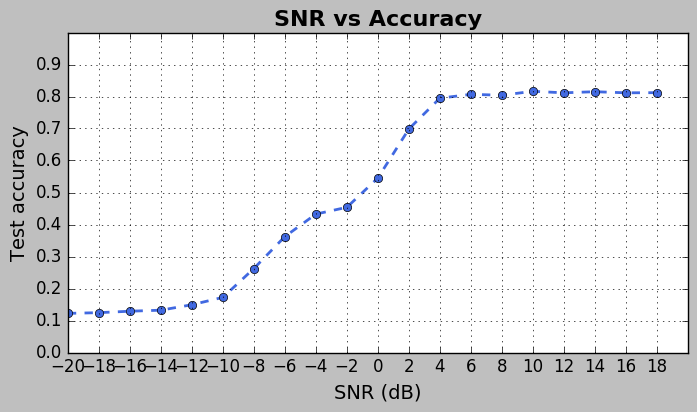

In [8]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [9]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = grid_search_cv.predict(X_32test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_32_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    420     3      3     1     3     51     51    14
BPSK      0   491      0     0     4      4      7     3
CPFSK    19     1    494    19     0      9      5     6
GFSK     20     0      3   480     0      3      5     4
PAM4      1     3      0     0   489      5      1     0
QAM16    13     2      0     0     3    165    146    16
QAM64     5     0      0     0     0    227    266    14
QPSK     22     0      0     0     1     36     19   443


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.77  0.01   0.01  0.00  0.01   0.09   0.09  0.03
BPSK   0.00  0.96   0.00  0.00  0.01   0.01   0.01  0.01
CPFSK  0.03  0.00   0.89  0.03  0.00   0.02   0.01  0.01
GFSK   0.04  0.00   0.01  0.93  0.00   0.01   0.01  0.01
PAM4   0.00  0.01   0.00  0.00  0.98   0.01   0.00  0.00
QAM16  0.04  0.01   0.00  0.00  0.01   0.48   0.42  0.05
QAM64  0.01  0.00   0.00  0.00  0.00   0.44   0.52  0.03
QPSK   0.04  0.00   0.00  0.00  0.00   0.07   0.04  0.85


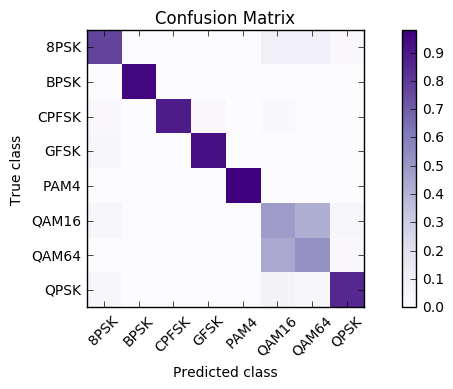

In [3]:
#Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(grid_search_cv, "svm2.1.pkl")

['svm2.1.pkl']

In [6]:
import pickle
from sklearn.externals import joblib
grid_search_cv = joblib.load("svm2.1.pkl")